# COVID19 CASES IN INDONESIA

![https://geology.com/world/indonesia-map.gif](https://geology.com/world/indonesia-map.gif)

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.
Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment. 

In Indonesia According to [[1](https://www.thejakartapost.com/news/2020/03/23/indonesias-latest-covid-19-figures.html)] The Health Ministry announced 4,465 new confirmed COVID-19 cases on Wednesday(23 september 2020), bringing the total number of infections nationwide to 257,388. According to data released by the ministry on Wednesday, 140 more people have died of the disease, bringing the death toll to 9,977. The total number of recovered patients has also increased to 187,958. The capital city recorded 1,133 new confirmed cases, bringing the total tally to 65,687. Meanwhile, West Java reported 516 new cases, East Java 338, Central Java 257, Banten 216 and West Sumatra 204. The virus has spread to all of the country's 34 provinces.




Source Information : https://www.thejakartapost.com/news/2020/03/23/indonesias-latest-covid-19-figures.html

In this work, we try to visualize a spreading virus that has spread the country's 34 provinces.
Source Data: https://www.kaggle.com/hendratno/covid19-indonesia

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['covid19-indonesia']


In [2]:
content = """Date
Location_ISO_Code
Location
New_Cases
New_Deaths
New_Recovered
New_Active_Cases
Total_Cases
Total_Deaths
Total_Recovered
Total_Active_Cases
Location_Level
City_or_Regency
Province
Country
Continent
Island
Time_Zone
Special_Status
Total_Regencies
Total_Cities
Total_Districts
Total_Urban_Villages
Total_Rural_Villages
Area_(km2)
Population
Population_Density
Longitude
Latitude
New_Cases_per_Million
Total_Cases_per_Million
New_Deaths_per_Million
Total_Deaths_per_Million
Case_Fatality_Rate
Case_Recovered_Rate
Growth_Factor_of_New_Cases
Growth_Factor_of_New_Deaths"""
columns_list = content.split("\n")
# for i in range(len(columns_list)):
#   columns_list[i] = columns_list[i].strip()

In [3]:
data = pd.read_csv("../input/covid19-indonesia/covid_19_indonesia_time_series_all.csv",header=0,names = columns_list,index_col=False)
data = data.set_index('Location')
data.head()



,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,39,-20,...,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,100.00%,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,39,-18,...,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,95.12%,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,2,0,0,2,...,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,0.00%,NaN
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,39,-16,...,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,90.70%,1.0


In [4]:
data.info()
data[0:10]

<class 'pandas.core.frame.DataFrame'>
Index: 20816 entries, DKI Jakarta to Sumatera Utara
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         20816 non-null  object 
 1   Location_ISO_Code            20816 non-null  object 
 2   New_Cases                    20816 non-null  int64  
 3   New_Deaths                   20816 non-null  int64  
 4   New_Recovered                20816 non-null  int64  
 5   New_Active_Cases             20816 non-null  int64  
 6   Total_Cases                  20816 non-null  int64  
 7   Total_Deaths                 20816 non-null  int64  
 8   Total_Recovered              20816 non-null  int64  
 9   Total_Active_Cases           20816 non-null  int64  
 10  Location_Level               20816 non-null  object 
 11  City_or_Regency              0 non-null      float64
 12  Province                     20202 non-null  object 
 13  Co

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,39,-20,...,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,100.00%,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,39,-18,...,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,95.12%,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,2,0,0,2,...,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,0.00%,NaN
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,39,-16,...,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,90.70%,1.0
Indonesia,3/3/2020,IDN,0,0,0,0,2,0,0,2,...,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,0.0
Jawa Barat,3/3/2020,ID-JB,1,1,0,0,1,1,2,-2,...,107.603708,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,200.00%,NaN
Riau,3/3/2020,ID-RI,0,0,0,0,2,0,0,2,...,101.805109,0.511648,0.00,0.33,0.00,0.00,0.00,0.00%,0.00%,0.0
DKI Jakarta,3/4/2020,ID-JK,2,0,0,2,45,20,39,-14,...,106.836118,-6.204699,0.18,4.15,0.00,1.84,0.18,44.44%,86.67%,1.0


Location_ISO_Code
New_Recovered
Total_Cases
Total_Deaths
Total_Recovered
Total_Active_Cases
Longitude
Latitude

In [5]:
data = data[['Date','Location_ISO_Code','New_Cases','New_Deaths','Total_Cases','Total_Deaths','Total_Recovered','New_Active_Cases','Total_Active_Cases','Longitude','Latitude']]
data.head(1000)

,Date,Location_ISO_Code,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Total_Recovered,New_Active_Cases,Total_Active_Cases,Longitude,Latitude
Location,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,39,20,39,2,-20,106.836118,-6.204699
DKI Jakarta,3/2/2020,ID-JK,2,0,41,20,39,2,-18,106.836118,-6.204699
Indonesia,3/2/2020,IDN,2,0,2,0,0,2,2,113.921327,-0.789275
Riau,3/2/2020,ID-RI,1,0,2,0,0,1,2,101.805109,0.511648
DKI Jakarta,3/3/2020,ID-JK,2,0,43,20,39,2,-16,106.836118,-6.204699
...,...,...,...,...,...,...,...,...,...,...,...
Indonesia,4/18/2020,IDN,325,15,6248,535,631,286,5082,113.921327,-0.789275
Jambi,4/18/2020,ID-JA,0,0,8,0,1,-1,7,102.723640,-1.697698
Jawa Barat,4/18/2020,ID-JB,11,0,551,77,98,7,376,107.603708,-6.920432


In [6]:
# convert Date column to date type
data["Date"] = pd.to_datetime(data["Date"])

# Visualization : Total_Cases & Total_Deaths

# All Cases in Indonesia

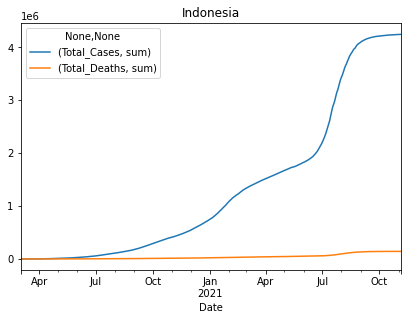

In [7]:
#IDN
ConfirmedCases_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_IDN= ConfirmedCases_date_IDN.join(fatalities_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

# COVID19 cases in each province

Text(0, 0.5, 'Confirmed cases')

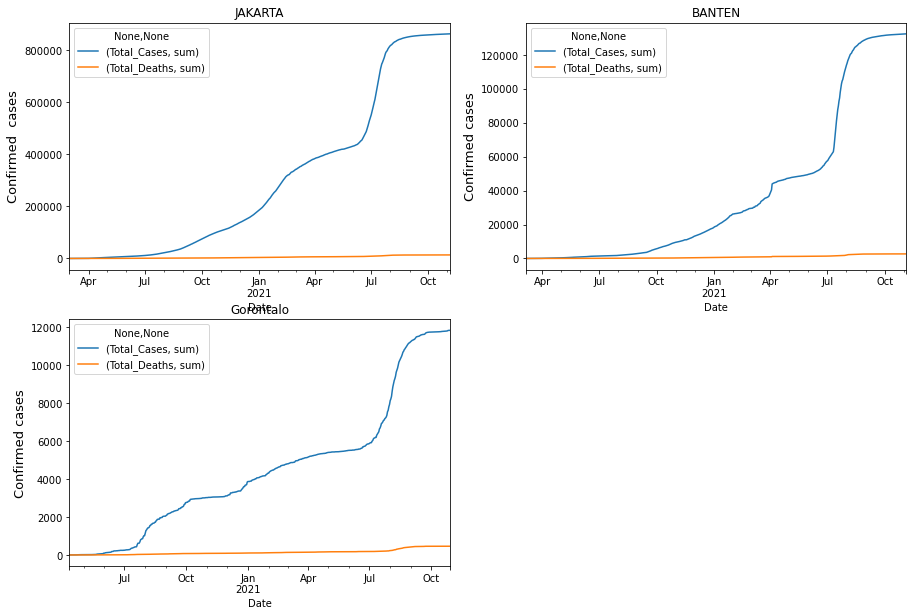

In [8]:
#ID-JK
ConfirmedCases_date_JK= data[data['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JK = data[data['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JK = ConfirmedCases_date_JK.join(fatalities_date_JK)


#ID-BT
ConfirmedCases_date_BT= data[data['Location_ISO_Code']=='ID-BT'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_BT = data[data['Location_ISO_Code']=='ID-BT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BT = ConfirmedCases_date_BT.join(fatalities_date_BT)


#ID-GO
ConfirmedCases_date_GO= data[data['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_GO = data[data['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_GO = ConfirmedCases_date_GO.join(fatalities_date_GO)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_JK.plot(ax=plt.gca(), title='JAKARTA')
plt.ylabel("Confirmed  cases", size=13)


plt.subplot(2, 2, 2)
total_date_BT.plot(ax=plt.gca(), title='BANTEN')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 3)
total_date_GO.plot(ax=plt.gca(), title='Gorontalo')
plt.ylabel("Confirmed cases", size=13)

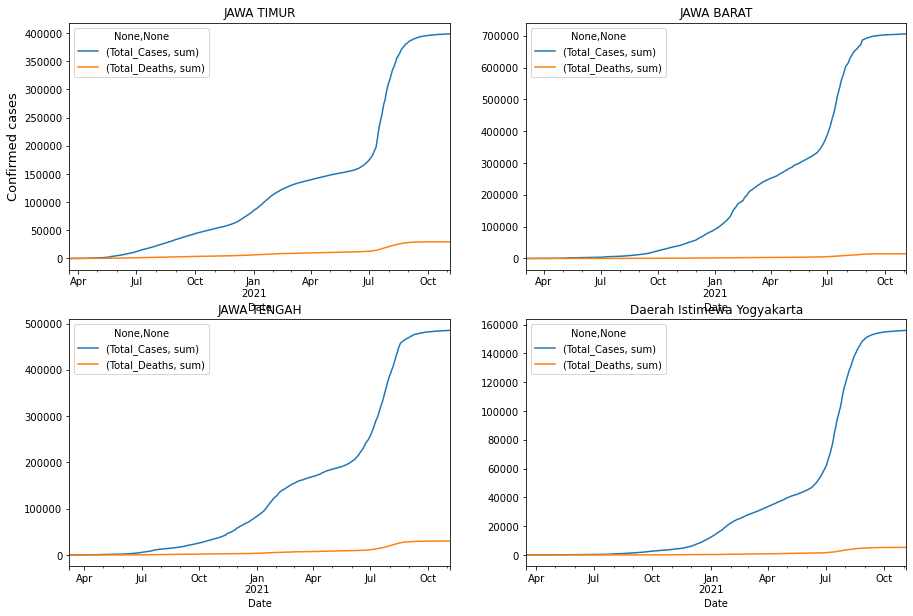

In [9]:
#ID-JI
ConfirmedCases_date_JI= data[data['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JI = data[data['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JI = ConfirmedCases_date_JI.join(fatalities_date_JI)


#ID-JB
ConfirmedCases_date_JB= data[data['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JB = data[data['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JB = ConfirmedCases_date_JB.join(fatalities_date_JB)


#ID-JT
ConfirmedCases_date_JT= data[data['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JT = data[data['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JT = ConfirmedCases_date_JT.join(fatalities_date_JT)


#ID-YO
ConfirmedCases_date_YO= data[data['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_YO = data[data['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_YO = ConfirmedCases_date_YO.join(fatalities_date_YO)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_JI.plot(ax=plt.gca(), title='JAWA TIMUR')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_JB.plot(ax=plt.gca(), title='JAWA BARAT')


plt.subplot(2, 2, 3)
total_date_JT.plot(ax=plt.gca(), title='JAWA TENGAH')

plt.subplot(2, 2, 4)
total_date_YO.plot(ax=plt.gca(), title='Daerah Istimewa Yogyakarta')


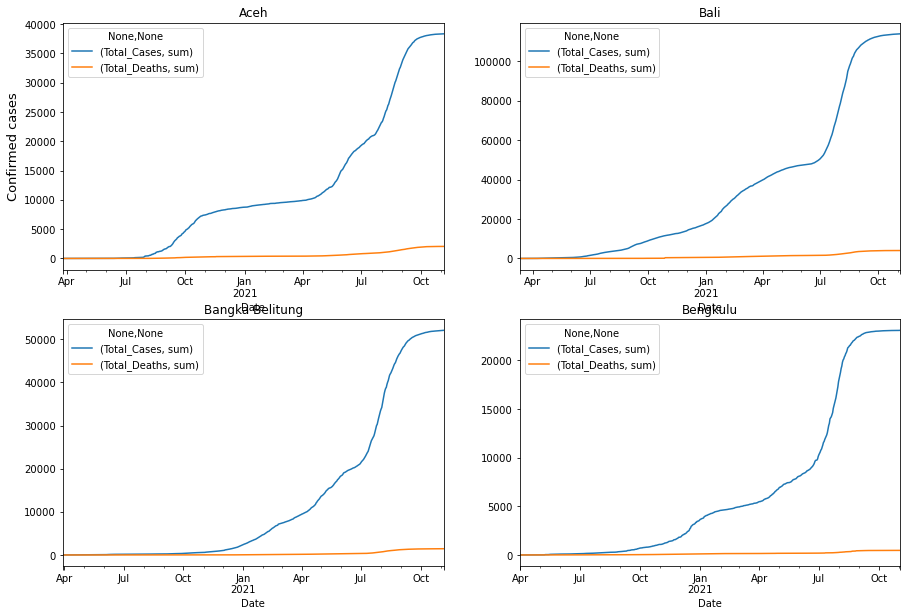

In [10]:
#ID-AC
ConfirmedCases_date_AC= data[data['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_AC = data[data['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_AC = ConfirmedCases_date_AC.join(fatalities_date_AC)


#ID-BA
ConfirmedCases_date_BA= data[data['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_BA = data[data['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BA = ConfirmedCases_date_BA.join(fatalities_date_BA)


#ID-BB
ConfirmedCases_date_BB= data[data['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_BB = data[data['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BB = ConfirmedCases_date_BB.join(fatalities_date_BB)


#ID-BE
ConfirmedCases_date_BE= data[data['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_BE = data[data['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BE = ConfirmedCases_date_BE.join(fatalities_date_BE)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_AC.plot(ax=plt.gca(), title='Aceh')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_BA.plot(ax=plt.gca(), title='Bali')


plt.subplot(2, 2, 3)
total_date_BB.plot(ax=plt.gca(), title='Bangka Belitung')

plt.subplot(2, 2, 4)
total_date_BE.plot(ax=plt.gca(), title='Bengkulu')

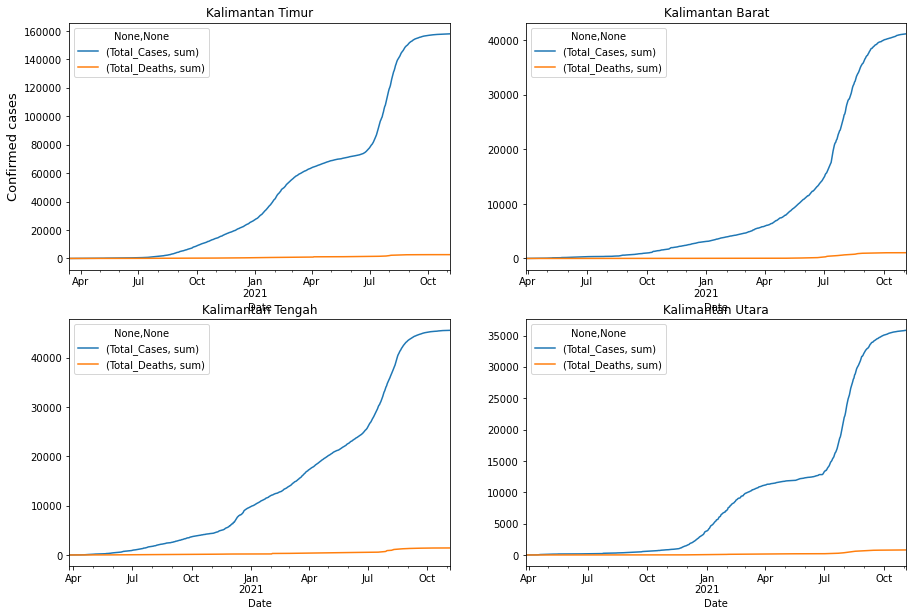

In [11]:
#ID-KI
ConfirmedCases_date_KI= data[data['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_KI = data[data['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KI = ConfirmedCases_date_KI.join(fatalities_date_BT)


#ID-KB
ConfirmedCases_date_KB= data[data['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_KB = data[data['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KB = ConfirmedCases_date_KB.join(fatalities_date_KB)



#ID-KT
ConfirmedCases_date_KT= data[data['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_KT = data[data['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KT = ConfirmedCases_date_KT.join(fatalities_date_KT)

#ID-KU
ConfirmedCases_date_KU= data[data['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_KU = data[data['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KU = ConfirmedCases_date_KU.join(fatalities_date_KU)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_KI.plot(ax=plt.gca(), title='Kalimantan Timur')
plt.ylabel("Confirmed cases", size=13)

plt.subplot(2, 2, 2)
total_date_KB.plot(ax=plt.gca(), title='Kalimantan Barat')

plt.subplot(2, 2, 3)
total_date_KT.plot(ax=plt.gca(), title='Kalimantan Tengah')

plt.subplot(2, 2, 4)
total_date_KU.plot(ax=plt.gca(), title='Kalimantan Utara')


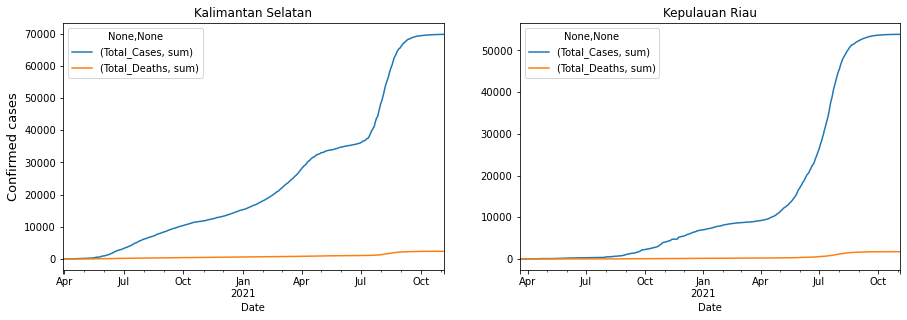

In [12]:

#ID-KS
ConfirmedCases_date_KS= data[data['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_KS = data[data['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KS = ConfirmedCases_date_KS.join(fatalities_date_KS)

#ID-KR
ConfirmedCases_date_KR= data[data['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_KR = data[data['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KR = ConfirmedCases_date_KR.join(fatalities_date_KR)






plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_KS.plot(ax=plt.gca(), title='Kalimantan Selatan')
plt.ylabel("Confirmed cases", size=13)



plt.subplot(2, 2, 2)
total_date_KR.plot(ax=plt.gca(), title='Kepulauan Riau')


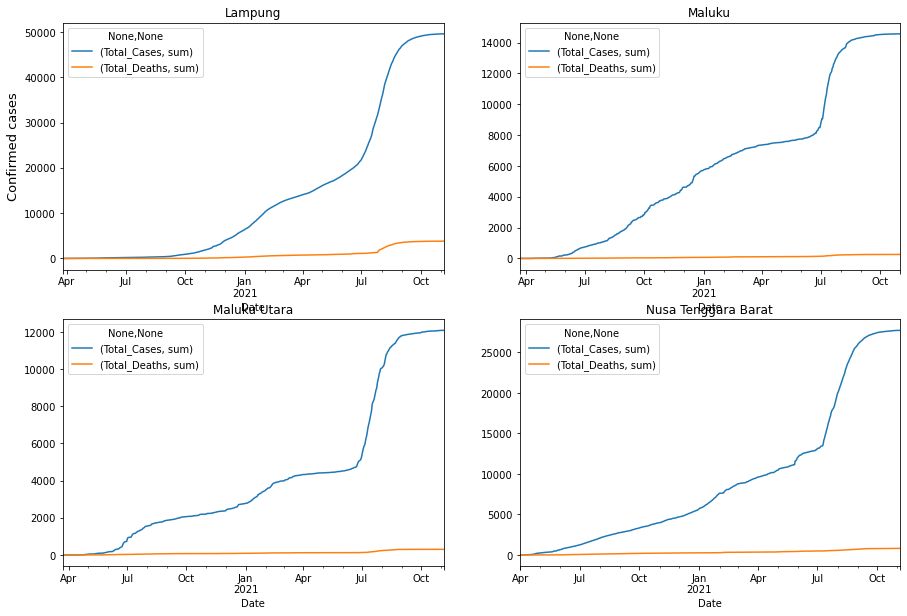

In [13]:
#ID-LA
ConfirmedCases_date_LA= data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_LA = data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_LA = ConfirmedCases_date_LA.join(fatalities_date_LA)


#ID-MA
ConfirmedCases_date_MA= data[data['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_MA = data[data['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_MA = ConfirmedCases_date_MA.join(fatalities_date_MA)



#ID-MU
ConfirmedCases_date_MU= data[data['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_MU = data[data['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_MU = ConfirmedCases_date_MU.join(fatalities_date_MU)

#ID-NB
ConfirmedCases_date_NB= data[data['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_NB = data[data['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_NB = ConfirmedCases_date_NB.join(fatalities_date_NB)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_LA.plot(ax=plt.gca(), title='Lampung')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_MA.plot(ax=plt.gca(), title='Maluku')


plt.subplot(2, 2, 3)
total_date_MU.plot(ax=plt.gca(), title='Maluku Utara')

plt.subplot(2, 2, 4)
total_date_NB.plot(ax=plt.gca(), title='Nusa Tenggara Barat')

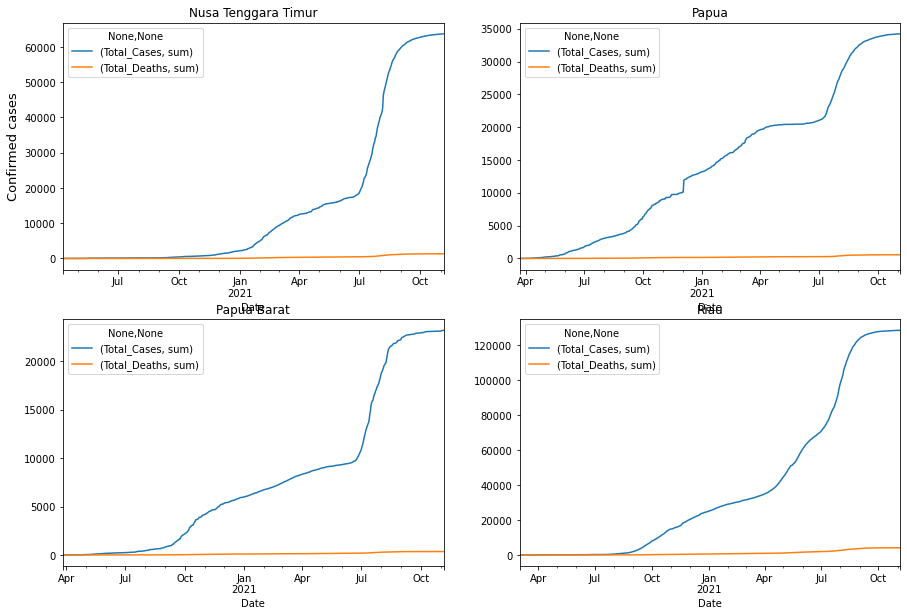

In [14]:
#ID-NT
ConfirmedCases_date_NT= data[data['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_NT = data[data['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_NT = ConfirmedCases_date_NT.join(fatalities_date_NT)


#ID-PA
ConfirmedCases_date_PA= data[data['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_PA = data[data['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_PA = ConfirmedCases_date_PA.join(fatalities_date_PA)

#ID-PB
ConfirmedCases_date_PB= data[data['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_PB = data[data['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_PB = ConfirmedCases_date_PB.join(fatalities_date_PB)

#ID-RI
ConfirmedCases_date_RI= data[data['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_RI = data[data['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_RI= ConfirmedCases_date_RI.join(fatalities_date_RI)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_NT.plot(ax=plt.gca(), title='Nusa Tenggara Timur')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_PA.plot(ax=plt.gca(), title='Papua')


plt.subplot(2, 2, 3)
total_date_PB.plot(ax=plt.gca(), title='Papua Barat')

plt.subplot(2, 2, 4)
total_date_RI.plot(ax=plt.gca(), title='Riau')

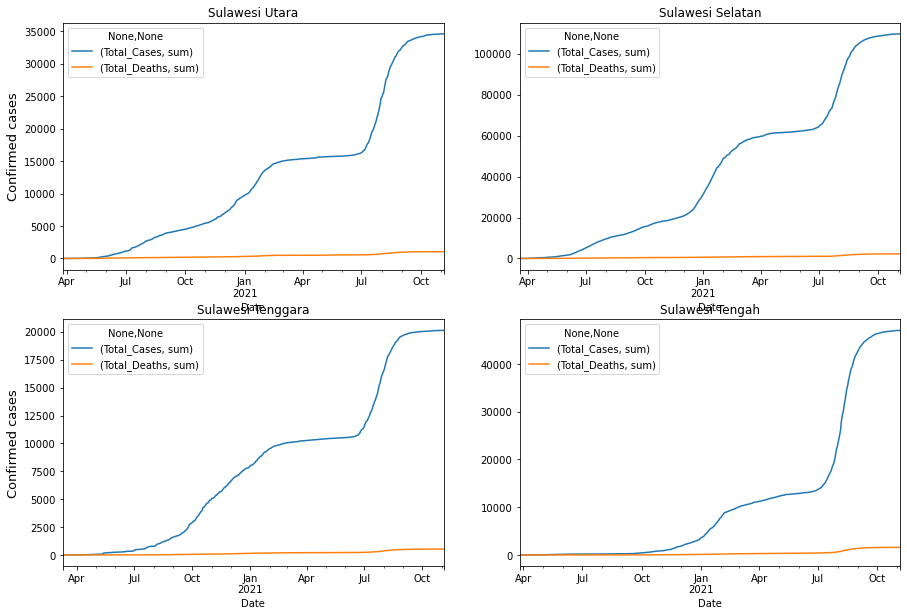

In [15]:
#ID-SA
ConfirmedCases_date_SA= data[data['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_SA = data[data['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SA = ConfirmedCases_date_SA.join(fatalities_date_SA)


#ID-SN
ConfirmedCases_date_SN= data[data['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_SN = data[data['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SN = ConfirmedCases_date_SN.join(fatalities_date_SN)

#ID-SG
ConfirmedCases_date_SG= data[data['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_SG = data[data['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SG = ConfirmedCases_date_SG.join(fatalities_date_SG)

#ID-ST
ConfirmedCases_date_ST= data[data['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_ST = data[data['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_ST = ConfirmedCases_date_ST.join(fatalities_date_ST)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_SA.plot(ax=plt.gca(), title='Sulawesi Utara')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_SN.plot(ax=plt.gca(), title='Sulawesi Selatan')

plt.subplot(2, 2, 3)
total_date_SG.plot(ax=plt.gca(), title='Sulawesi Tenggara')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 4)
total_date_ST.plot(ax=plt.gca(), title='Sulawesi Tengah')

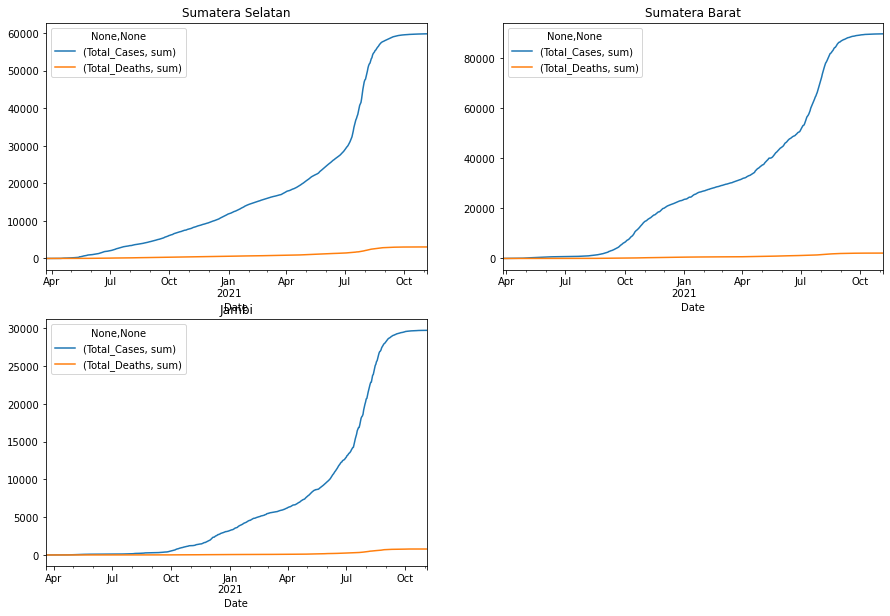

In [16]:
#ID-SS
ConfirmedCases_date_SS= data[data['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_SS = data[data['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SS= ConfirmedCases_date_SS.join(fatalities_date_SS)

#ID-SB
ConfirmedCases_date_SB= data[data['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_SB = data[data['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SB = ConfirmedCases_date_SB.join(fatalities_date_SB)


#ID-JA
ConfirmedCases_date_JA= data[data['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JA = data[data['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JA = ConfirmedCases_date_JA.join(fatalities_date_JA)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_SS.plot(ax=plt.gca(), title='Sumatera Selatan')


plt.subplot(2, 2, 2)
total_date_SB.plot(ax=plt.gca(), title='Sumatera Barat')


plt.subplot(2, 2, 3)
total_date_JA.plot(ax=plt.gca(), title='Jambi')


# Visualization : Total_Recovered  &  Total_Deaths

#  All Cases in Indonesia

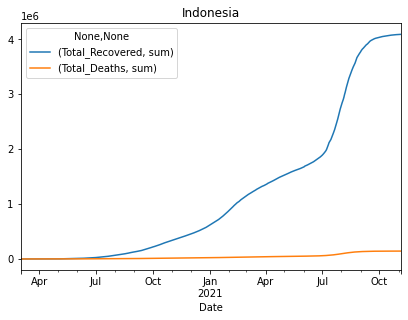

In [17]:
#IDN
Total_Recovered_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_IDN= Total_Recovered_date_IDN.join(Total_Deaths_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

# COVID19 cases in each province

Text(0, 0.5, 'Confirmed cases')

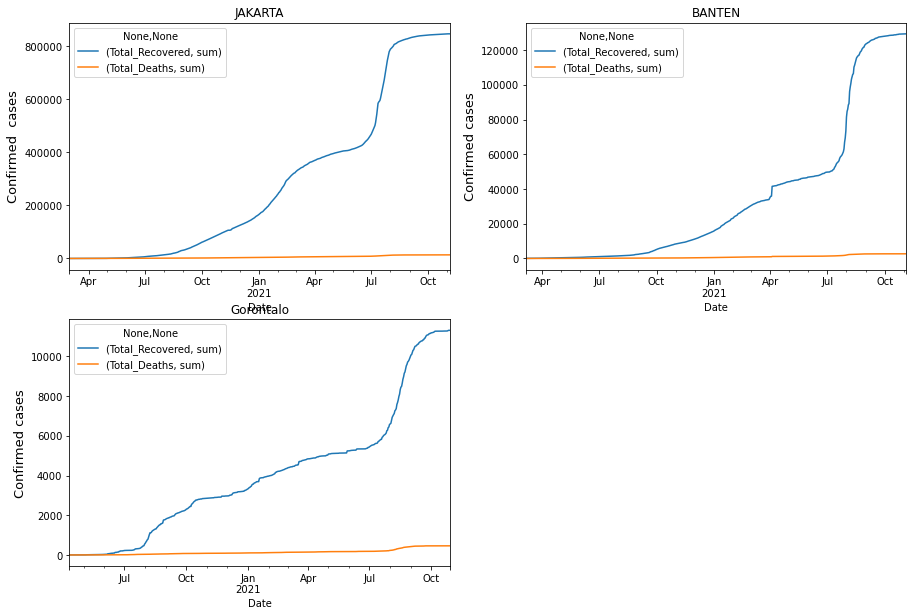

In [18]:
#ID-JK
Total_Recovered_date_JK= data[data['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JK = data[data['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JK = Total_Recovered_date_JK.join(Total_Deaths_date_JK)


#ID-BT
Total_Recovered_date_BT= data[data['Location_ISO_Code']=='ID-BT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_BT = data[data['Location_ISO_Code']=='ID-BT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BT = Total_Recovered_date_BT.join(Total_Deaths_date_BT)


#ID-GO
Total_Recovered_date_GO= data[data['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_GO = data[data['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_GO = Total_Recovered_date_GO.join(Total_Deaths_date_GO)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_JK.plot(ax=plt.gca(), title='JAKARTA')
plt.ylabel("Confirmed  cases", size=13)


plt.subplot(2, 2, 2)
total_date_BT.plot(ax=plt.gca(), title='BANTEN')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 3)
total_date_GO.plot(ax=plt.gca(), title='Gorontalo')
plt.ylabel("Confirmed cases", size=13)

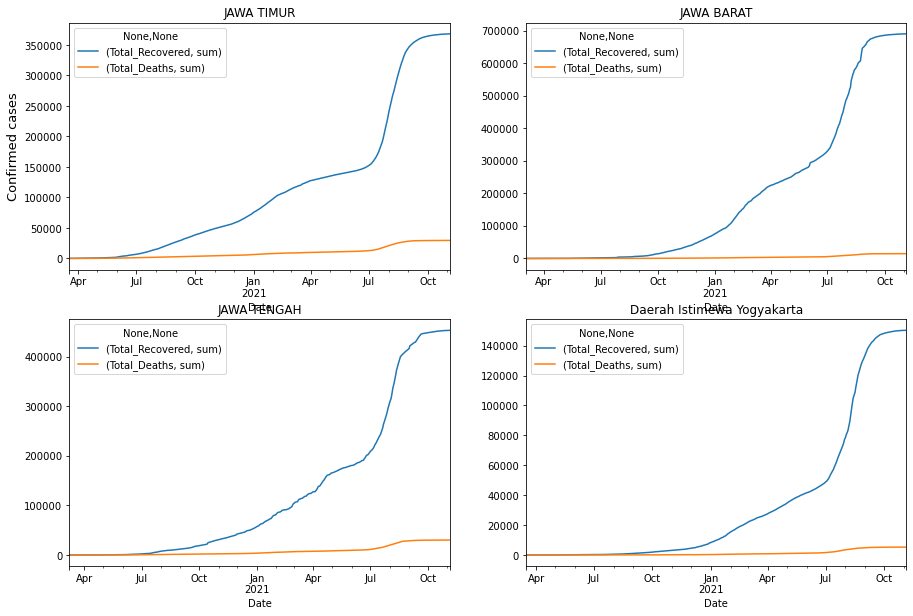

In [19]:
#ID-JI
Total_Recovered_date_JI= data[data['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JI = data[data['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JI = Total_Recovered_date_JI.join(Total_Deaths_date_JI)


#ID-JB
Total_Recovered_date_JB= data[data['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JB = data[data['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JB = Total_Recovered_date_JB.join(Total_Deaths_date_JB)


#ID-JT
Total_Recovered_date_JT= data[data['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JT = data[data['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JT = Total_Recovered_date_JT.join(Total_Deaths_date_JT)


#ID-YO
Total_Recovered_date_YO= data[data['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_YO = data[data['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_YO = Total_Recovered_date_YO.join(Total_Deaths_date_YO)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_JI.plot(ax=plt.gca(), title='JAWA TIMUR')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_JB.plot(ax=plt.gca(), title='JAWA BARAT')


plt.subplot(2, 2, 3)
total_date_JT.plot(ax=plt.gca(), title='JAWA TENGAH')

plt.subplot(2, 2, 4)
total_date_YO.plot(ax=plt.gca(), title='Daerah Istimewa Yogyakarta')


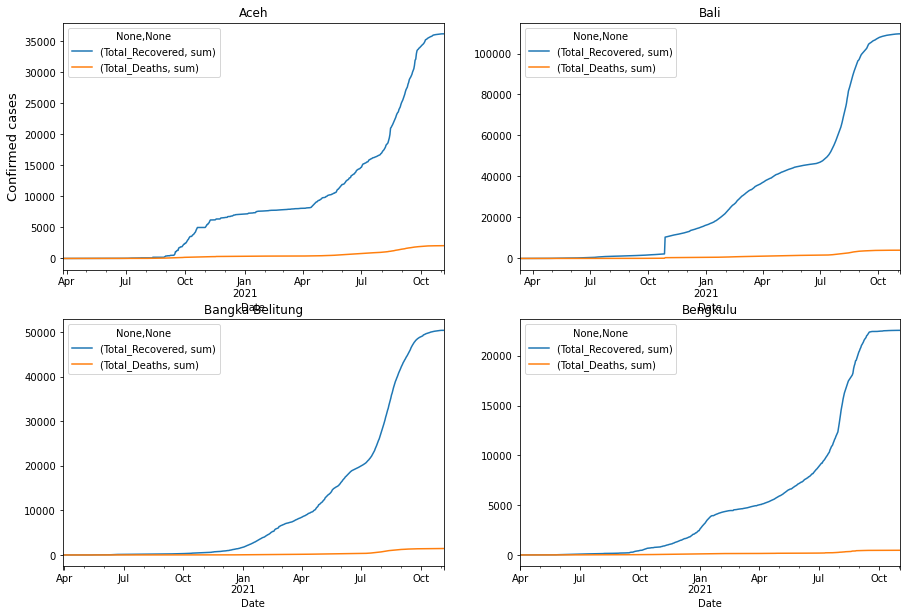

In [20]:
#ID-AC
ConfirmedCases_date_AC= data[data['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_date_AC = data[data['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_AC = ConfirmedCases_date_AC.join(fatalities_date_AC)


#ID-BA
ConfirmedCases_date_BA= data[data['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_date_BA = data[data['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BA = ConfirmedCases_date_BA.join(fatalities_date_BA)


#ID-BB
ConfirmedCases_date_BB= data[data['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_date_BB = data[data['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BB = ConfirmedCases_date_BB.join(fatalities_date_BB)


#ID-BE
ConfirmedCases_date_BE= data[data['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_date_BE = data[data['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BE = ConfirmedCases_date_BE.join(fatalities_date_BE)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_AC.plot(ax=plt.gca(), title='Aceh')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_BA.plot(ax=plt.gca(), title='Bali')


plt.subplot(2, 2, 3)
total_date_BB.plot(ax=plt.gca(), title='Bangka Belitung')

plt.subplot(2, 2, 4)
total_date_BE.plot(ax=plt.gca(), title='Bengkulu')

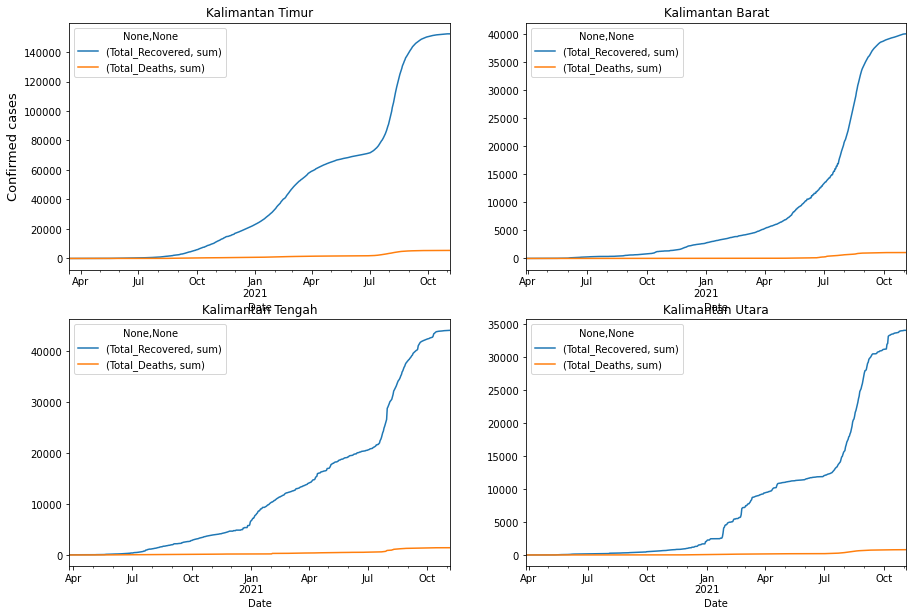

In [21]:
#ID-KI
Total_Recovered_date_KI= data[data['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KI = data[data['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KI = Total_Recovered_date_KI.join(Total_Deaths_date_KI)


#ID-KB
Total_Recovered_date_KB= data[data['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KB = data[data['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KB = Total_Recovered_date_KB.join(Total_Deaths_date_KB)

#ID-KT
Total_Recovered_date_KT= data[data['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KT = data[data['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KT = Total_Recovered_date_KT.join(Total_Deaths_date_KT)

#ID-KU
Total_Recovered_date_KU= data[data['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KU = data[data['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KU = Total_Recovered_date_KU.join(Total_Deaths_date_KU)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_KI.plot(ax=plt.gca(), title='Kalimantan Timur')
plt.ylabel("Confirmed cases", size=13)

plt.subplot(2, 2, 2)
total_date_KB.plot(ax=plt.gca(), title='Kalimantan Barat')


plt.subplot(2, 2, 3)
total_date_KT.plot(ax=plt.gca(), title='Kalimantan Tengah')

plt.subplot(2, 2, 4)
total_date_KU.plot(ax=plt.gca(), title='Kalimantan Utara')


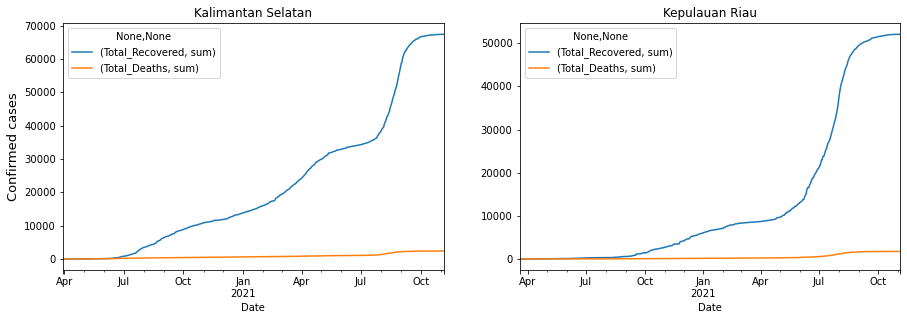

In [22]:
#ID-KS
Total_Recovered_date_KS= data[data['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KS = data[data['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KS = Total_Recovered_date_KS.join(Total_Deaths_date_KS)

#ID-KR
Total_Recovered_date_KR= data[data['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KR = data[data['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KR = Total_Recovered_date_KR.join(Total_Deaths_date_KR)





plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_KS.plot(ax=plt.gca(), title='Kalimantan Selatan')

plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_KR.plot(ax=plt.gca(), title='Kepulauan Riau')



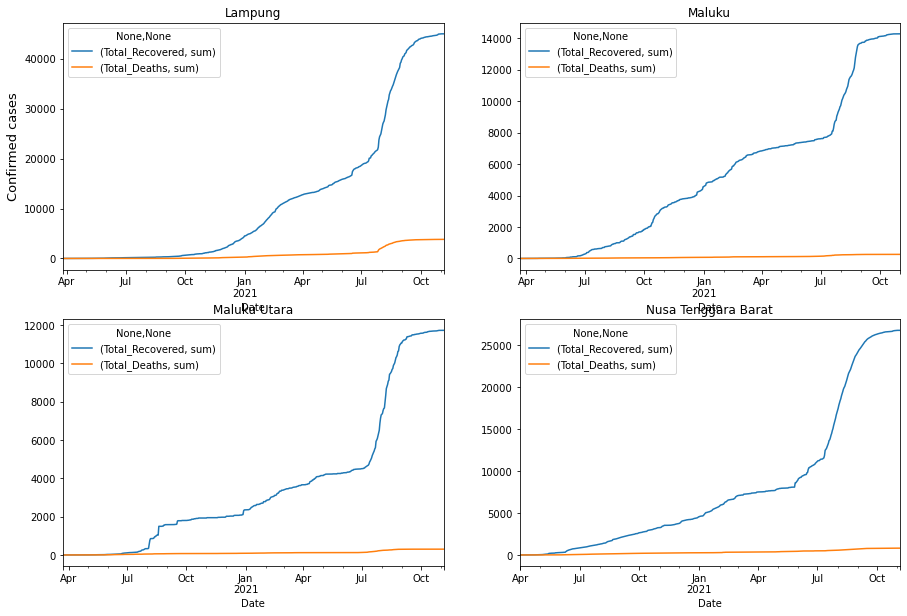

In [23]:
#ID-LA
Total_Recovered_date_LA= data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_LA = data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_LA = Total_Recovered_date_LA.join(Total_Deaths_date_LA)


#ID-MA
Total_Recovered_date_MA= data[data['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_MA = data[data['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_MA = Total_Recovered_date_MA.join(Total_Deaths_date_MA)



#ID-MU
Total_Recovered_date_MU= data[data['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_MU = data[data['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_MU = Total_Recovered_date_MU.join(Total_Deaths_date_MU)

#ID-NB
Total_Recovered_date_NB= data[data['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_NB = data[data['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_NB = Total_Recovered_date_NB.join(Total_Deaths_date_NB)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_LA.plot(ax=plt.gca(), title='Lampung')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_MA.plot(ax=plt.gca(), title='Maluku')


plt.subplot(2, 2, 3)
total_date_MU.plot(ax=plt.gca(), title='Maluku Utara')

plt.subplot(2, 2, 4)
total_date_NB.plot(ax=plt.gca(), title='Nusa Tenggara Barat')

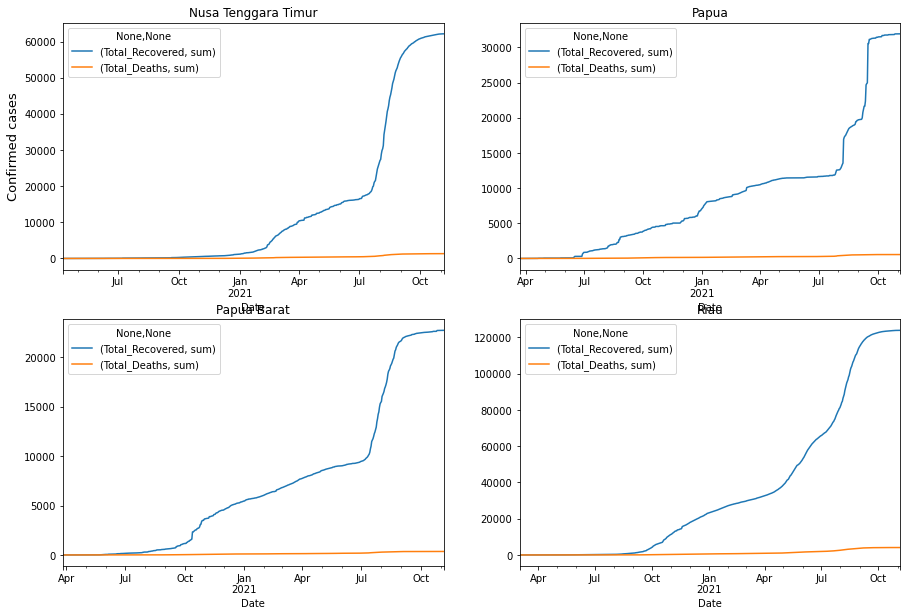

In [24]:
#ID-NT
Total_Recovered_date_NT= data[data['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_NT = data[data['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_NT = Total_Recovered_date_NT.join(Total_Deaths_date_NT)


#ID-PA
Total_Recovered_date_PA= data[data['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_PA = data[data['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_PA = Total_Recovered_date_PA.join(Total_Deaths_date_PA)

#ID-PB
Total_Recovered_date_PB= data[data['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_PB = data[data['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_PB = Total_Recovered_date_PB.join(Total_Deaths_date_PB)

#ID-RI
Total_Recovered_date_RI= data[data['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_RI = data[data['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_RI= Total_Recovered_date_RI.join(Total_Deaths_date_RI)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_NT.plot(ax=plt.gca(), title='Nusa Tenggara Timur')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_PA.plot(ax=plt.gca(), title='Papua')


plt.subplot(2, 2, 3)
total_date_PB.plot(ax=plt.gca(), title='Papua Barat')

plt.subplot(2, 2, 4)
total_date_RI.plot(ax=plt.gca(), title='Riau')

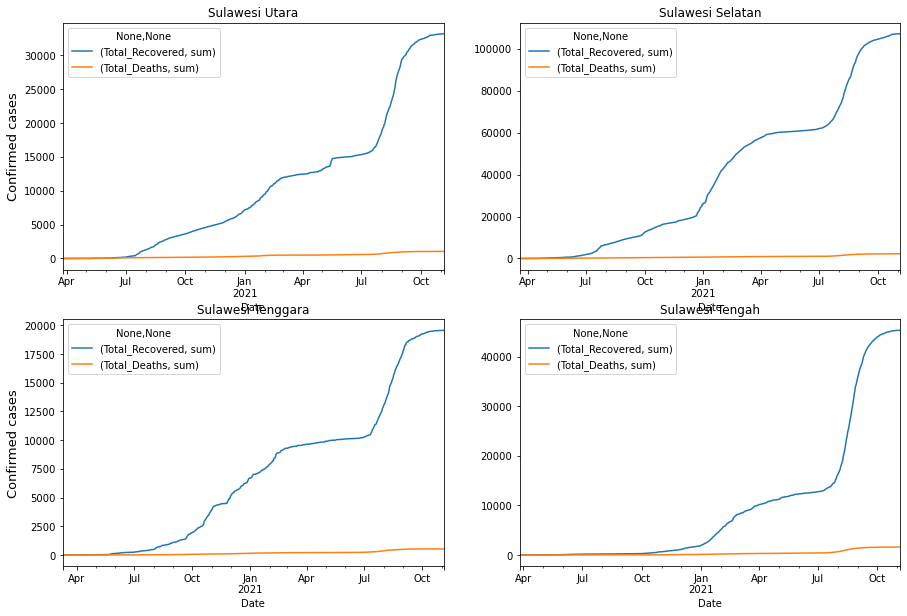

In [25]:
#ID-SA
Total_Recovered_date_SA= data[data['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SA = data[data['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SA = Total_Recovered_date_SA.join(Total_Deaths_date_SA)


#ID-SN
Total_Recovered_date_SN= data[data['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SN = data[data['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SN = Total_Recovered_date_SN.join(Total_Deaths_date_SN)

#ID-SG
Total_Recovered_date_SG= data[data['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SG = data[data['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SG = Total_Recovered_date_SG.join(Total_Deaths_date_SG)

#ID-ST
Total_Recovered_date_ST= data[data['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_ST = data[data['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_ST = Total_Recovered_date_ST.join(Total_Deaths_date_ST)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_SA.plot(ax=plt.gca(), title='Sulawesi Utara')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_SN.plot(ax=plt.gca(), title='Sulawesi Selatan')

plt.subplot(2, 2, 3)
total_date_SG.plot(ax=plt.gca(), title='Sulawesi Tenggara')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 4)
total_date_ST.plot(ax=plt.gca(), title='Sulawesi Tengah')

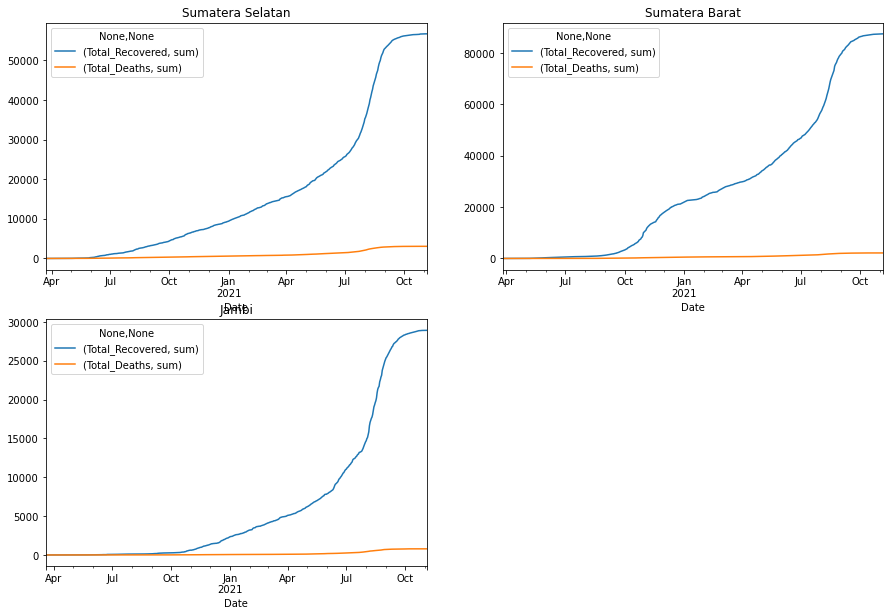

In [26]:
#ID-SS
Total_Recovered_date_SS= data[data['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SS = data[data['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SS= Total_Recovered_date_SS.join(Total_Deaths_date_SS)

#ID-SB
Total_Recovered_date_SB= data[data['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SB = data[data['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SB = Total_Recovered_date_SB.join(Total_Deaths_date_SB)


#ID-JA
Total_Recovered_date_JA= data[data['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JA = data[data['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JA = Total_Recovered_date_JA.join(Total_Deaths_date_JA)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_SS.plot(ax=plt.gca(), title='Sumatera Selatan')


plt.subplot(2, 2, 2)
total_date_SB.plot(ax=plt.gca(), title='Sumatera Barat')


plt.subplot(2, 2, 3)
total_date_JA.plot(ax=plt.gca(), title='Jambi')


# Visualization : Total_Cases & New_Active_Cases

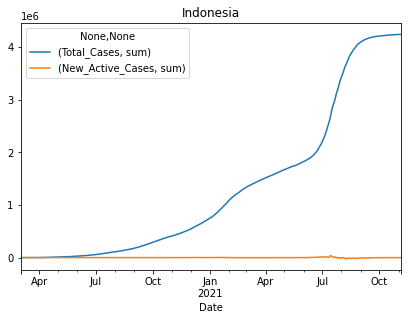

In [27]:
# All Cases in Indonesia
#IDN
TotalCases_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Cases':['sum']})
New_Active_Cases_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'New_Active_Cases':['sum']})
total_date_IDN= TotalCases_date_IDN.join(New_Active_Cases_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

# # Visualization : Total_Deaths & New_Deathss

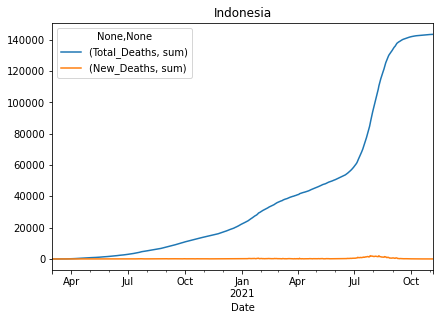

In [28]:
# All Cases in Indonesia
#IDN
Total_Deaths_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
New_Deaths_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'New_Deaths':['sum']})
total_date_IDN= Total_Deaths_date_IDN.join(New_Deaths_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

# PREDICTION

In [29]:
data1 = pd.read_csv("../input/covid19-indonesia/covid_19_indonesia_time_series_all.csv",header=0,names = columns_list,index_col=False)
data1 = data1.set_index('Location')
data1.head()


,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,39,-20,...,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,100.00%,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,39,-18,...,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,95.12%,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,2,0,0,2,...,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,0.00%,NaN
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,39,-16,...,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,90.70%,1.0


In [30]:
data1= data1.replace([np.inf, -np.inf], np.nan)
data1 = data1.fillna(0)
data1

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,39,-20,...,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,100.00%,0.00
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,39,-18,...,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,95.12%,1.00
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,0.00
Riau,3/2/2020,ID-RI,1,0,0,1,2,0,0,2,...,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,0.00%,0.00
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,39,-16,...,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,90.70%,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sulawesi Tengah,11/5/2021,ID-ST,11,0,0,11,47056,1595,45307,154,...,121.201093,-1.004137,3.72,15921.14,0.00,539.66,53.97,3.39%,96.28%,1.57
Sulawesi Utara,11/5/2021,ID-SA,3,1,1,1,34636,1039,33162,435,...,124.521240,1.259638,1.14,13110.34,0.38,393.28,39.33,3.00%,95.74%,1.50
Sumatera Barat,11/5/2021,ID-SB,1,0,3,-2,89786,2147,87424,215,...,100.465062,-0.850253,0.18,16267.80,0.00,389.00,38.90,2.39%,97.37%,1.00


This work, we tried to forecast COVID19 spreading in Indonesia.
Variable prediction:
Date
1. Location_ISO_Code
1. New_Recovered		
1. Total_Cases	
1. Total_Deaths
1. Total_Recovered	
1. Total_Active_Cases
1. Longitude	
1. Latitude

Target : 
1. New_Cases	
1. New_Deaths

In [31]:
##Convert sting to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [32]:
data1 = FunLabelEncoder(data1)
data1.info()
data1.iloc[235:300,:]

<class 'pandas.core.frame.DataFrame'>
Index: 20816 entries, DKI Jakarta to Sumatera Utara
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         20816 non-null  int64  
 1   Location_ISO_Code            20816 non-null  int64  
 2   New_Cases                    20816 non-null  int64  
 3   New_Deaths                   20816 non-null  int64  
 4   New_Recovered                20816 non-null  int64  
 5   New_Active_Cases             20816 non-null  int64  
 6   Total_Cases                  20816 non-null  int64  
 7   Total_Deaths                 20816 non-null  int64  
 8   Total_Recovered              20816 non-null  int64  
 9   Total_Active_Cases           20816 non-null  int64  
 10  Location_Level               20816 non-null  int64  
 11  City_or_Regency              20816 non-null  float64
 12  Province                     20816 non-null  int64  
 13  Co

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
Sulawesi Tenggara,221,27,0,0,0,0,3,0,9,-6,...,122.070311,-4.124689,0.00,1.14,0.00,0.00,0.00,0,928,1.00
Sumatera Selatan,221,30,0,0,0,0,1,2,1,-2,...,104.169465,-3.216212,0.00,0.12,0.00,0.24,0.02,532,39,1.00
Sumatera Utara,221,32,0,0,0,0,1,1,1,-1,...,99.051964,2.191894,0.00,0.07,0.00,0.07,0.01,210,39,1.00
Aceh,223,0,1,0,0,1,1,0,0,1,...,96.910522,4.225615,0.19,0.19,0.00,0.00,0.00,0,0,0.00
Bali,223,1,0,0,0,0,2,2,1,-1,...,115.131714,-8.369472,0.00,0.47,0.00,0.47,0.05,210,1709,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jambi,227,6,0,0,0,0,1,0,0,1,...,102.723640,-1.697698,0.00,0.29,0.00,0.00,0.00,0,0,1.00
Jawa Barat,227,7,19,3,1,15,106,24,16,66,...,107.603708,-6.920432,0.42,2.35,0.07,0.53,0.05,548,264,1.19
Jawa Tengah,227,10,15,2,2,11,75,16,20,39,...,110.201115,-7.259097,0.41,2.06,0.05,0.44,0.04,536,763,1.88


# SPLITING DATA
Data for training and testing To select a set of training data that will be input in the Machine Learning algorithm, to ensure that the classification algorithm training can be generalized well to new data. For this study using a sample size of 10% ( aims to reduce the overfitting effect).

# Target 1 : New_Cases

In [33]:
from sklearn.model_selection import train_test_split
Y = data1['New_Cases']
X = data1.drop(columns=['New_Cases'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=9)

In [34]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (18734, 35)
Y train shape:  (18734,)
X test shape:  (2082, 35)
Y test shape:  (2082,)


# Decision tree classification
A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. The decision tree analyzes a set of data to construct a set of rules or questions, which are used to predict a class, i.e., the goal of decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In this sense the decision tree selects the best attribute using to divide the records, converting that attribute into a decision node and dividing the data set into smaller subsets, to finally start the construction of the tree repeating this process recursively.

In [35]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=None)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict = dtcla.predict(X_test)

In [36]:
#Test
X_test

,Date,Location_ISO_Code,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
Indonesia,177,34,268,7261,703,1322866,35786,1128672,158408,0,...,113.921327,-0.789275,31.04,4988.45,1.01,134.95,13.49,489,4700,0.97
Sulawesi Utara,611,25,0,18,3,4023,160,3030,833,1,...,124.521240,1.259638,7.95,1522.78,0.00,60.56,6.06,691,3689,21.00
Riau,251,24,0,1,0,15,3,2,10,1,...,101.805109,0.511648,0.16,2.47,0.00,0.49,0.05,518,173,1.00
DKI Jakarta,511,9,19,589,-95,30463,1022,20580,8861,1,...,106.836118,-6.204699,47.30,2808.65,1.75,94.23,9.42,628,2979,0.93
Bali,423,1,0,1,32,553,4,227,322,1,...,115.131714,-8.369472,7.83,131.16,0.00,0.95,0.09,30,1300,2.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jawa Tengah,70,10,7,84,27,484830,30108,452750,1972,1,...,110.201115,-7.259097,3.24,13332.67,0.19,827.96,82.80,972,5536,1.30
Jawa Tengah,168,10,9,489,178,145832,6088,91855,47889,1,...,110.201115,-7.259097,18.59,4010.33,0.25,167.42,16.74,734,2603,0.78
Sumatera Selatan,131,30,5,48,23,10226,553,8493,1180,1,...,104.169465,-3.216212,9.25,1244.41,0.61,67.29,6.73,872,4476,1.17


# Target 2 : New_Deaths

In [37]:
from sklearn.model_selection import train_test_split
Y1 = data1['New_Deaths']
X1 = data1.drop(columns=['New_Deaths'])
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=9)

In [38]:
print('X1 train shape: ', X1_train.shape)
print('Y1 train shape: ', Y1_train.shape)
print('X1 test shape: ', X1_test.shape)
print('Y1 test shape: ', Y1_test.shape)

X1 train shape:  (18734, 35)
Y1 train shape:  (18734,)
X1 test shape:  (2082, 35)
Y1 test shape:  (2082,)


In [39]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=None)

# We train model
dtcla.fit(X1_train, Y1_train)

# We predict target values
Y1_predict = dtcla.predict(X1_test)

In [40]:
#Test
data1=X1_test
data1

,Date,Location_ISO_Code,New_Cases,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
Indonesia,177,34,8232,7261,703,1322866,35786,1128672,158408,0,...,113.921327,-0.789275,31.04,4988.45,1.01,134.95,13.49,489,4700,0.97
Sulawesi Utara,611,25,21,18,3,4023,160,3030,833,1,...,124.521240,1.259638,7.95,1522.78,0.00,60.56,6.06,691,3689,21.00
Riau,251,24,1,1,0,15,3,2,10,1,...,101.805109,0.511648,0.16,2.47,0.00,0.49,0.05,518,173,1.00
DKI Jakarta,511,9,513,589,-95,30463,1022,20580,8861,1,...,106.836118,-6.204699,47.30,2808.65,1.75,94.23,9.42,628,2979,0.93
Bali,423,1,33,1,32,553,4,227,322,1,...,115.131714,-8.369472,7.83,131.16,0.00,0.95,0.09,30,1300,2.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jawa Tengah,70,10,118,84,27,484830,30108,452750,1972,1,...,110.201115,-7.259097,3.24,13332.67,0.19,827.96,82.80,972,5536,1.30
Jawa Tengah,168,10,676,489,178,145832,6088,91855,47889,1,...,110.201115,-7.259097,18.59,4010.33,0.25,167.42,16.74,734,2603,0.78
Sumatera Selatan,131,30,76,48,23,10226,553,8493,1180,1,...,104.169465,-3.216212,9.25,1244.41,0.61,67.29,6.73,872,4476,1.17


In [41]:
#Create a  DataFrame
submission = pd.DataFrame({'New_Cases':Y_predict,'New_Deaths':Y1_predict})
                        

#Visualize the first 100 rows
submission.head(100)

,New_Cases,New_Deaths
0,9687,267
1,21,0
2,1,0
3,551,18
4,33,0
...,...,...
95,64,6
96,11,0
97,5,0
98,87,0


In [42]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
